Tyler D. French, Andre J. Jaberi

In [1]:
import matplotlib.pyplot as plt

path = "images_processed_2/lungs/"
filenames = ["No_781_450_1.png",
             "CO_13_10_0.png",
             "Pn_643_85_1.png"]

names = ["Normal Lung", "COVID-19", "Pneumothorax"]

images = []
for filename in filenames:
    images.append(plt.imread(path + filename))
    
    

In [2]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Initialize empty arrays to hold blocks of data

i1 = []; i2 = []; i3 = []; i4 = []; i5 = []

for imgi in range(len(images)):

    blocks = []; blocks_dct = []; blocks_dctr = []; blocks_idct = []
    
    image = images[imgi]
    # Iterate through rows and columns
    for i in range(4):
        for j in range(2):

            # Select current block
            image = rgb2gray(image)
            block = image[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)]
            block_dct = dct(dct(block, axis=0),  axis=1)
            flatblock = block_dct.flatten()
            level_25th = np.argsort(abs(flatblock))[::-1][400:]
            
            new_block = np.zeros(flatblock.shape)
            new_block[level_25th] = flatblock[level_25th]
            reshaped = new_block.reshape(np.shape(block_dct))
            block_rebuilt = idct(idct(reshaped, axis=0), axis=1)

            blocks.append(block)
            blocks_dct.append(block_dct)
            blocks_dctr.append(reshaped)
            blocks_idct.append(block_rebuilt)

    # Initializing Viewing Arrays
    image_out = np.full((800, 350), 1.0)
    image_dct = np.full((800, 350), 0)
    image_dctr = np.full((800, 350), 0)
    image_idct = np.full((800, 350), 1.0)

    # Load data into viewing output image arrays
    for i in range(4):
        for j in range(2):
            ind = 2*i + j

            image_out[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks[ind]
            # Log scale included for display
            image_dct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dct[ind]) + 0.1)
            image_dctr[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dctr[ind]) + 0.1)
            image_idct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks_idct[ind]

    image_idct = np.round(256*image_idct/image_idct.max())
    image = np.round(256*image/image.max())
    diff = abs(image - image_idct)
    i1.append(image_out)
    i2.append(image_dct)
    i3.append(image_dctr)
    i4.append(image_idct)
    i5.append(diff)

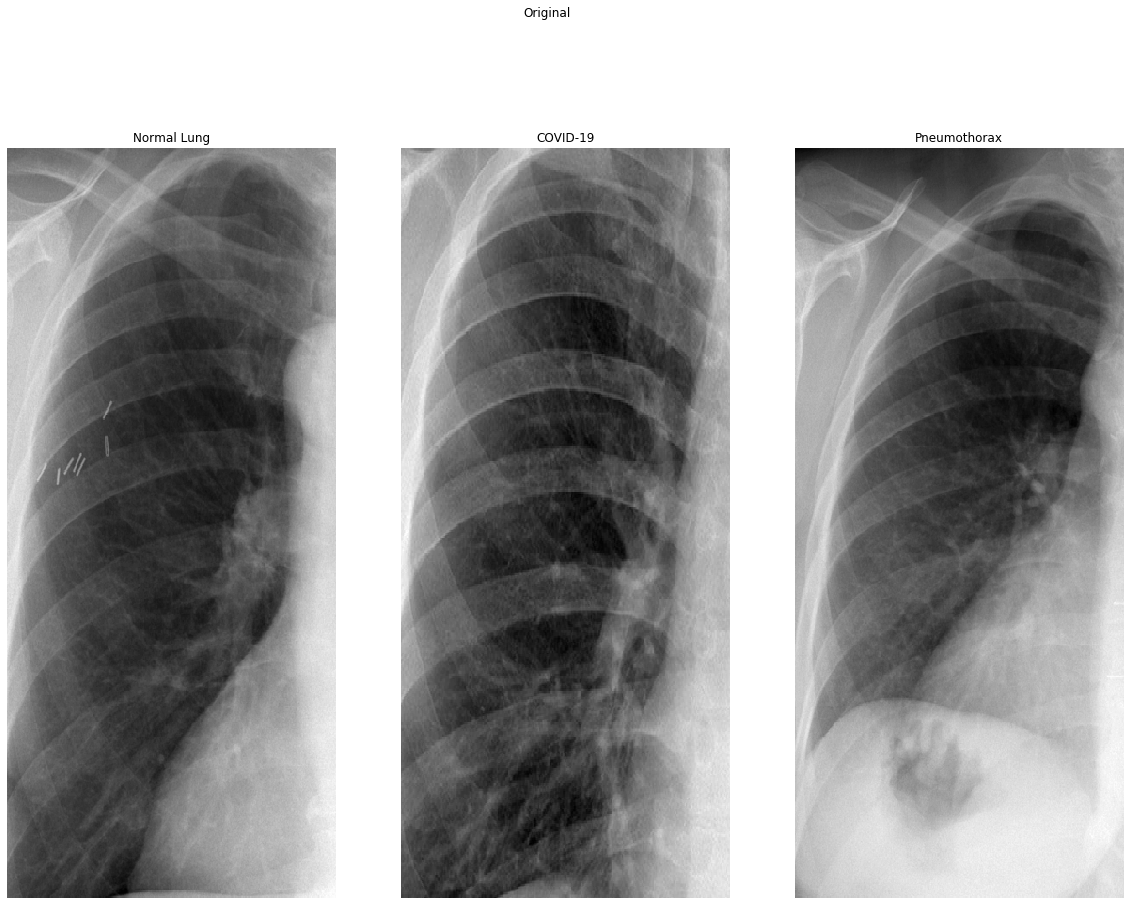

In [3]:
# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i1[i], cmap = 'gray')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Original")
plt.show()

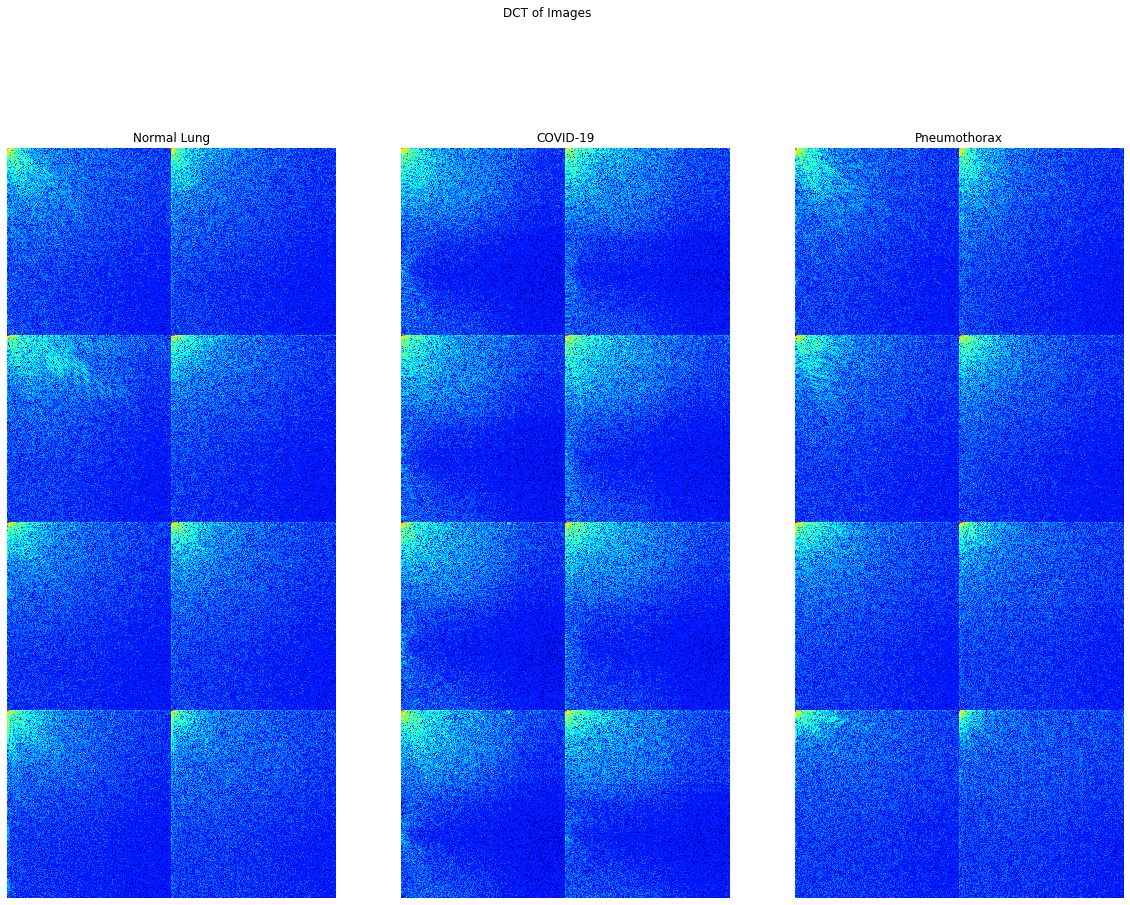

In [4]:
# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i2[i], cmap = 'jet')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT of Images")
plt.show()

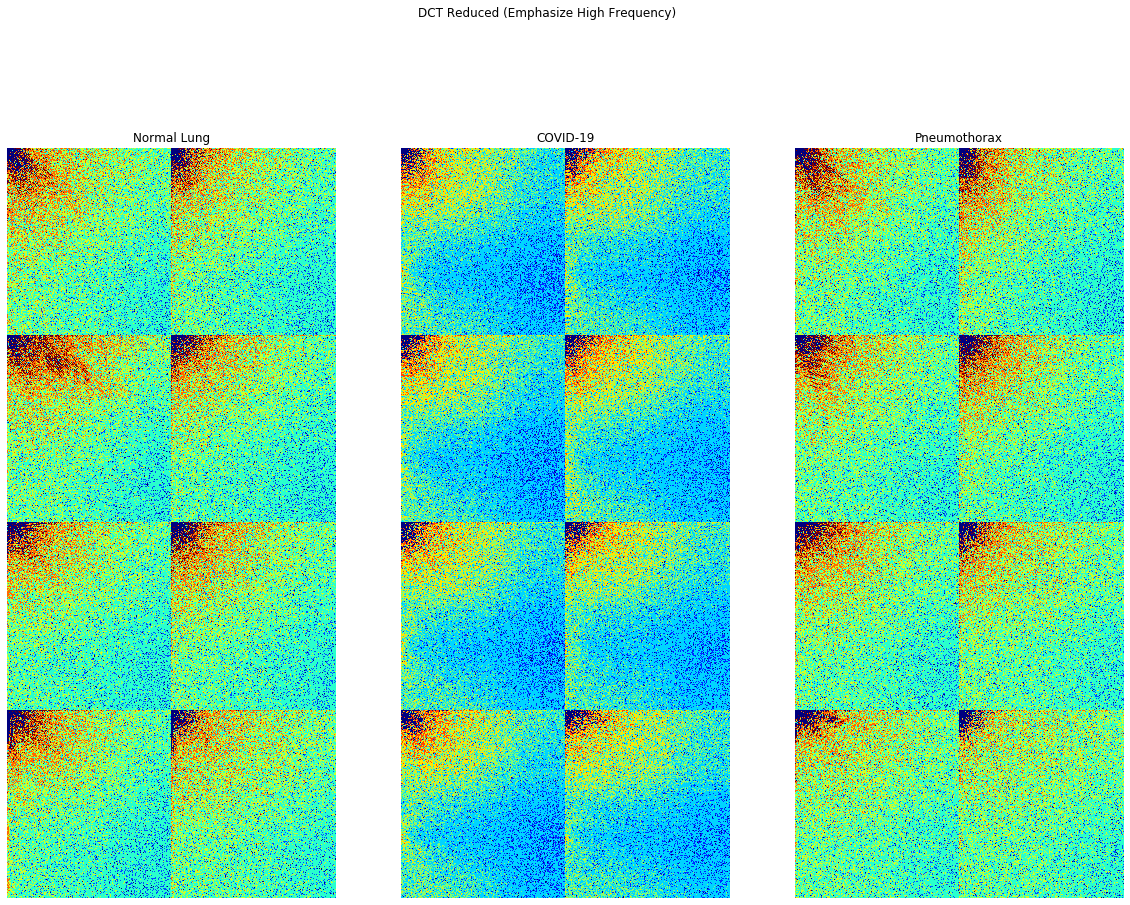

In [5]:
# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(i3[i], cmap = 'jet')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced (Emphasize High Frequency)")
plt.show()

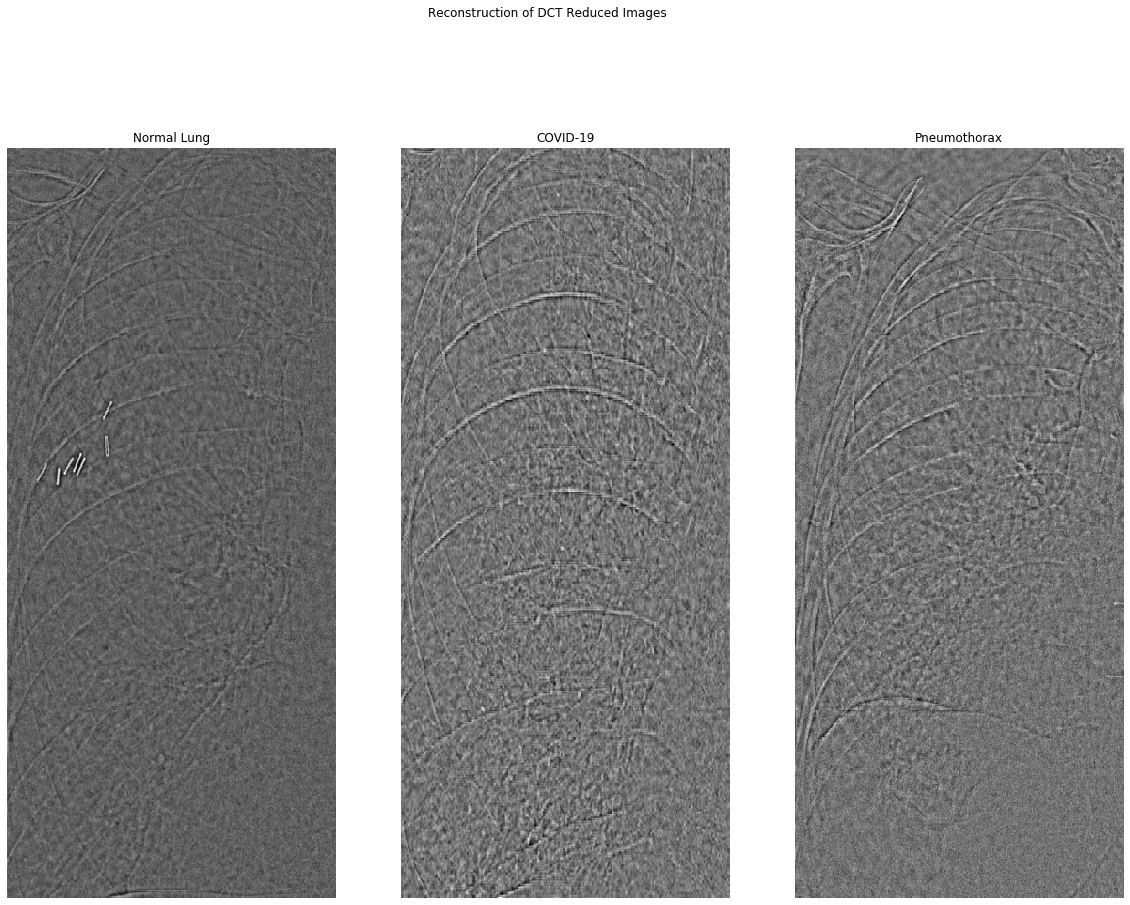

In [6]:
# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    plt.imshow(i4[i], cmap = 'gray')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Reconstruction of DCT Reduced Images")
plt.show()

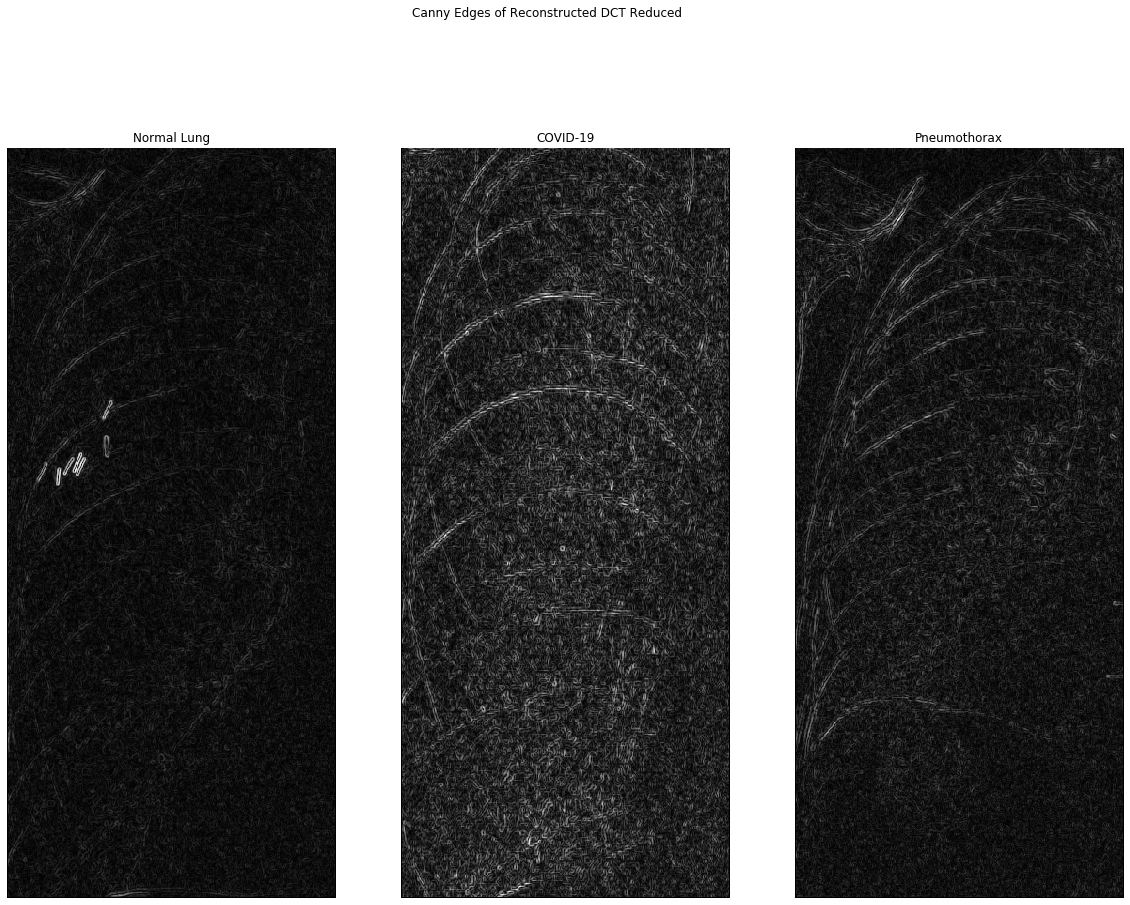

In [16]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    img_canny = feature.canny(i4[i], sigma = 10)
    img_sobel = sobel(i4[i])
    plt.imshow(img_sobel, cmap = 'gray')
    plt.title(names[i])
    plt.axis(False)
    print(np.max(img_sobel, axis=(0,1))
fig = plt.gcf()
fig.suptitle("Canny Edges of Reconstructed DCT Reduced")
plt.show()


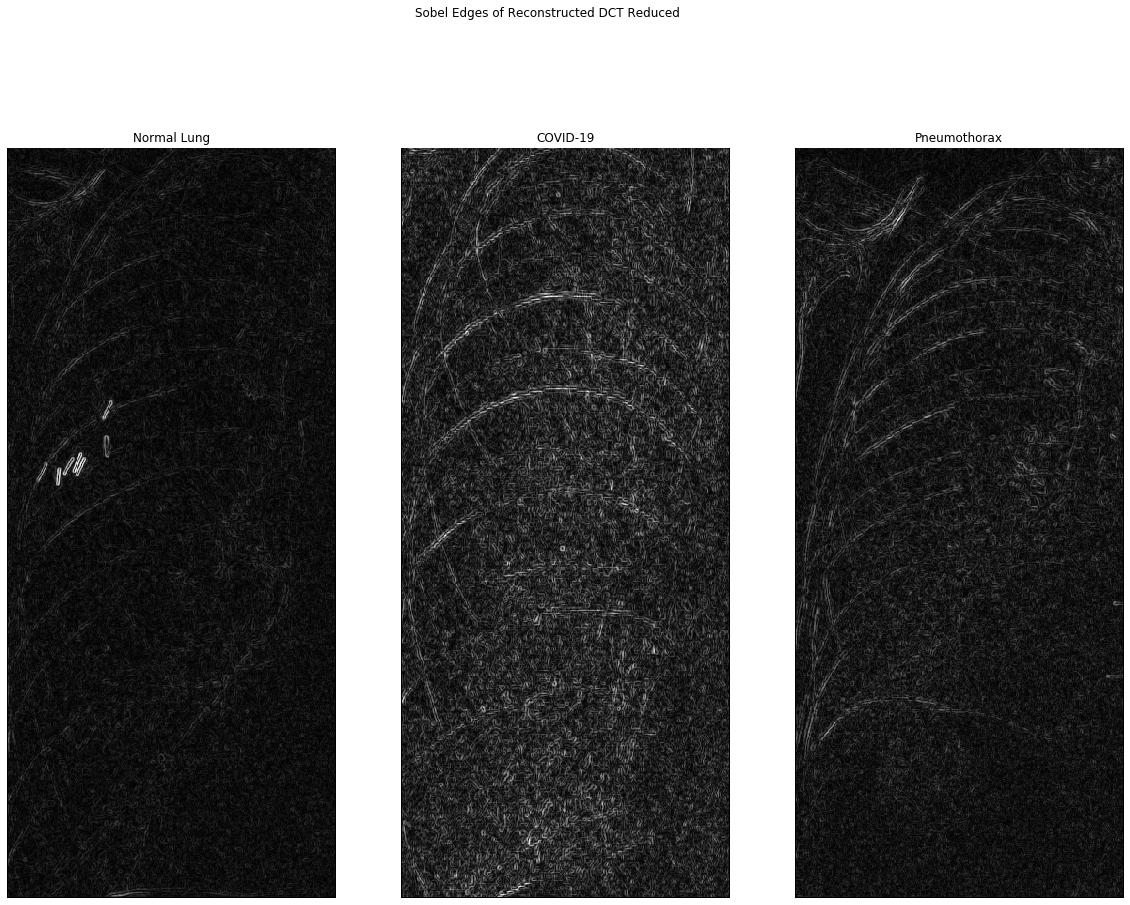

In [8]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    img_canny = feature.canny(i4[i], sigma = 5)
    img_sobel = sobel(i4[i])
    plt.imshow(img_sobel, cmap = 'gray')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Sobel Edges of Reconstructed DCT Reduced")
plt.show()


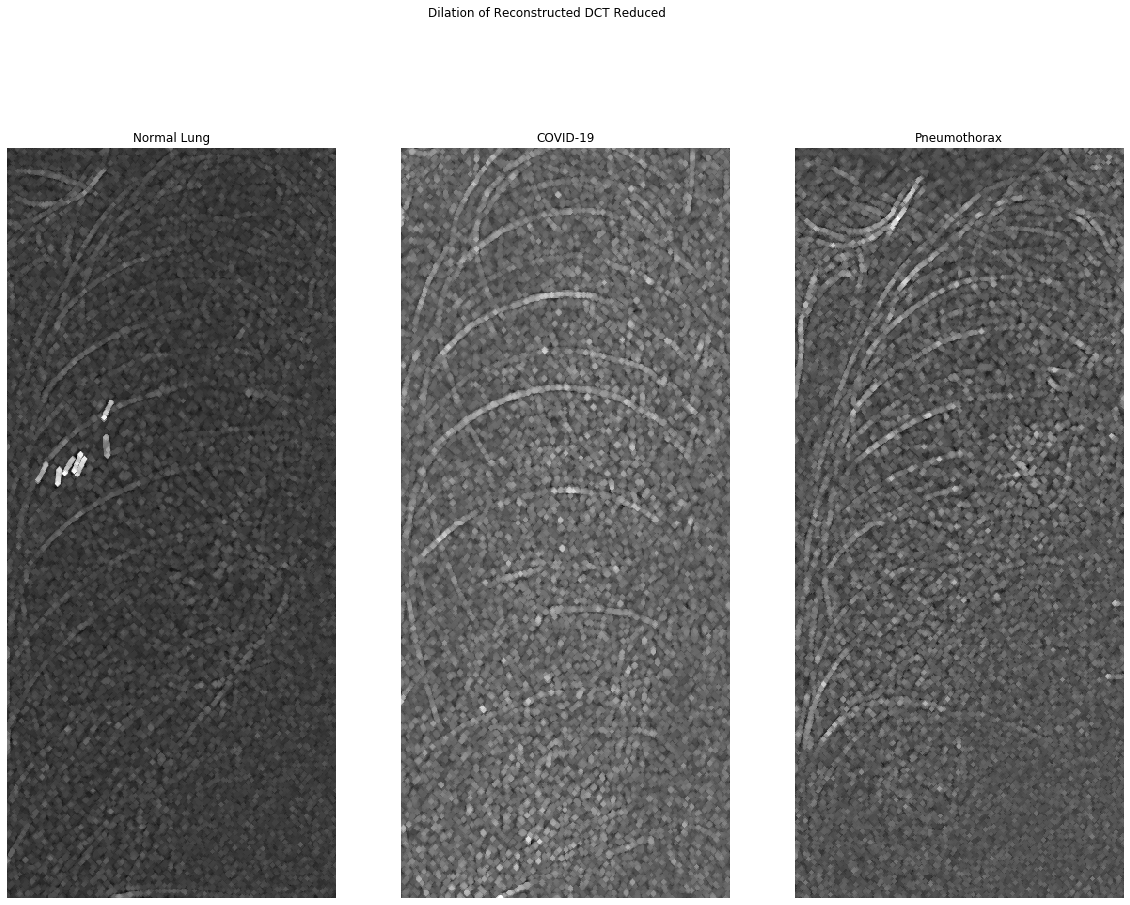

In [9]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray
import cv2

    

# Display Plots
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    kernel = np.array([[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]], np.uint8)
    dilate = cv2.dilate(i4[i], kernel, iterations = 1)
    plt.imshow(dilate, cmap = 'gray')
    plt.title(names[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Dilation of Reconstructed DCT Reduced")
plt.show()